# Tutorial 1 - Generation of impedance data
Now that is clear how to define the input information, we can generate some
impedance data using the `generate_data.py` module.\
First of all, let's add the parent folder path to import the functions that
we need.

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

## Single element cases
### Resistor
To begin, we can take a single element, for example `R1`, that has an
associated parameter $R = 100\,\Omega$. We have to encode it in a
configuration file, which is divided in sections, that for this case is the `config_gen_resistor.ini`.\
The encoding is done with the lines

[Circuit]\
diagram = (R1)

[Parameters]\
R1 = 100

Now, to get all the information from the configuration file, we have to read
it first in the pyhton module.

In [2]:
from read import configparser

config = configparser.ConfigParser()
config.read('Configs_tutorial/config_gen_resistor.ini')

['Configs_tutorial/config_gen_resistor.ini']

Then we load the circuit diagram and the parameters inside the config file
into the python module

In [3]:
from read import read_input_circuit_diagram, read_input_parameters

circuit_diagram = read_input_circuit_diagram(config)
parameters = read_input_parameters(config)

The constant element conditions are not relevant in the generation
module, thus they are all set to 1 from now on with the function

In [4]:
from generate_data import generate_constant_conditions_data

constant_conditions = generate_constant_conditions_data(parameters)

With that we are creating a `Circuit` object that will contain the
input information

In [5]:
from generate_data import generate_circuit

generation_circuit = generate_circuit(circuit_diagram, parameters,
                                      constant_conditions)

From the circuit settings we can get an impedance function (correlated with
its non-constant parameters). A method of the `Circuit` class, named
`generate_analyzed_circuit` lets us to create another object, this time an `AnalysisCircuit` object, that analyzes the input information and stores
inside himself the results of the analysis.\
For example, the impedance funtion will be in the `impedance` attribute

In [6]:
analyzed_circuit = generation_circuit.generate_analyzed_circuit()
impedance_function = analyzed_circuit.impedance

Now we can set the number of frequency points in a specific range: for
instance, let's take 100 points between $0.1\,Hz$ and $100\,kHz$. In the
configuration file this can be done specifying the lower and upper order of
magnitude fo thr tenth power and the number of points. The frequency points
will have a logarithmic distribution between the tenth powers of each of the
two orders of magnitute

[Frequencies]\
lower_order_of_magnitude = -1\
upper_order_of_magnitude = 5\
number_of_points = 100

Again, after setting all in the configuration file (read only in the
beginning, so put all the inputs before anything else), we have to extract it

In [7]:
from read import read_input_frequencies

frequency = read_input_frequencies(config)

To simulate some random noise we need to compute all the circuit's parameters
first, then the corresponding pure signal is generated. The simulated noise
is added after the creation of the pure signal

In [8]:
final_parameters = analyzed_circuit.list_parameters()
impedance_signal = impedance_function(final_parameters, frequency)

For the sake of reproducibility, the seed is set through the configuration
file. The chosen seed for these tutorials is just a number that I liked, with
no other specific reason. Thus in the configuration file

[Noise]\
seed = 330

With this we can generate the noise for our signal

In [9]:
from generate_data import simulate_noise, read_input_seed

seed_number = read_input_seed(config)
impedance = simulate_noise(seed_number, impedance_signal)

Now, if we plot the impedance amplitude and phase, we should get a constant
impedance with amplitude $Z = 100\,\Omega$ and 0° phase.

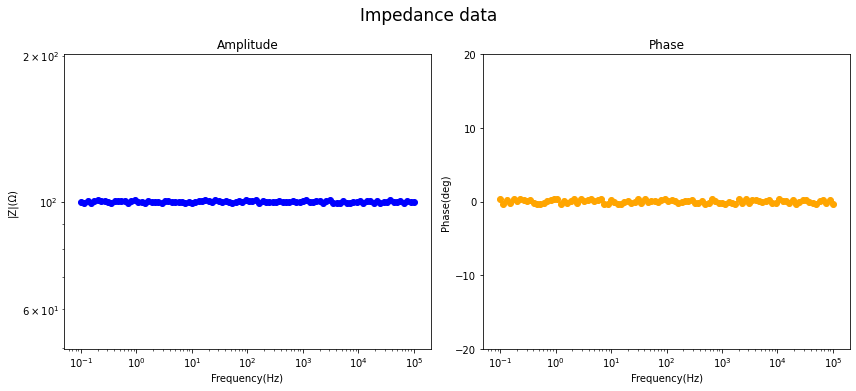

In [10]:
from plot_and_save import plot_data

plot_data(frequency, impedance)

### Capacitor
Another simple example is the capacitor case. We can take a capacitor `C1`
with a capacitance $C = 1\,\mu F$, keeping the same frequencies.
Again these settings must be specified in a configuration file, now
`config_gen_capacitor.ini`\
If we apply the same instructions as before

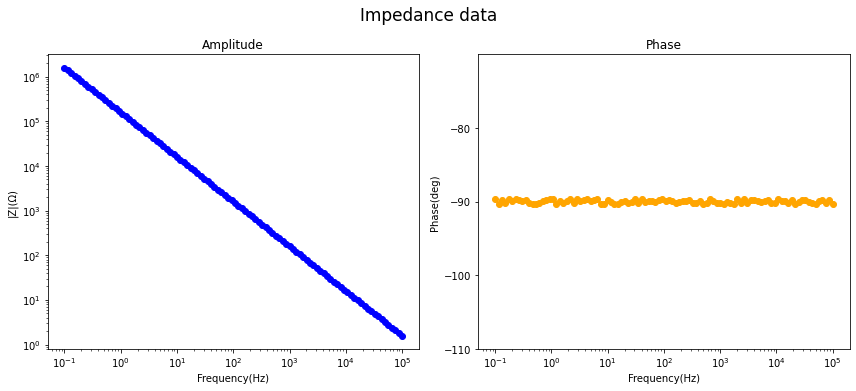

In [11]:
config = configparser.ConfigParser()
config.read('Configs_tutorial/config_gen_capacitor.ini')

circuit_diagram_capacitator = read_input_circuit_diagram(config)
parameters_capacitor = read_input_parameters(config)

constant_conditions = generate_constant_conditions_data(parameters_capacitor)
capacitative_circuit = generate_circuit(circuit_diagram_capacitator,
                                        parameters_capacitor,
                                        constant_conditions)
analyzed_capacitative_circuit = capacitative_circuit.generate_analyzed_circuit()
impedance_function = analyzed_capacitative_circuit.impedance

final_parameters = analyzed_capacitative_circuit.list_parameters()
impedance_signal = impedance_function(final_parameters, frequency)
seed_number = read_input_seed(config)
impedance = simulate_noise(seed_number, impedance_signal)

plot_data(frequency, impedance)

## Two-element circuits
### RC series 
One of the most basic circuit that however manages to describe real-life data
is the RC series circuit. As explained before, the "in series" junction is
done delimitating the elements with round brakets. The diagram will be then
`(R1C2)` that corresponds to the circuit
<p align="center">
    <img src="Images_tutorial/RC_series.png" alt="image" width="500"/>
</p>

Now, if we set $R = 1\,k\Omega$ and $C = 1\,\mu F$ in the configuration file

[Circuit]\
diagram = (R1C2)

[Parameters]\
R1 = 1000\
C2 = 1e-6


In [12]:
config = configparser.ConfigParser()
config.read('Configs_tutorial/config_gen_RC_series.ini')

circuit_diagram_rc = read_input_circuit_diagram(config)
parameters_rc = read_input_parameters(config)

constant_conditions = generate_constant_conditions_data(parameters_rc)
circuit_rc = generate_circuit(circuit_diagram_rc, parameters_rc,
                              constant_conditions)

The resultant plot is

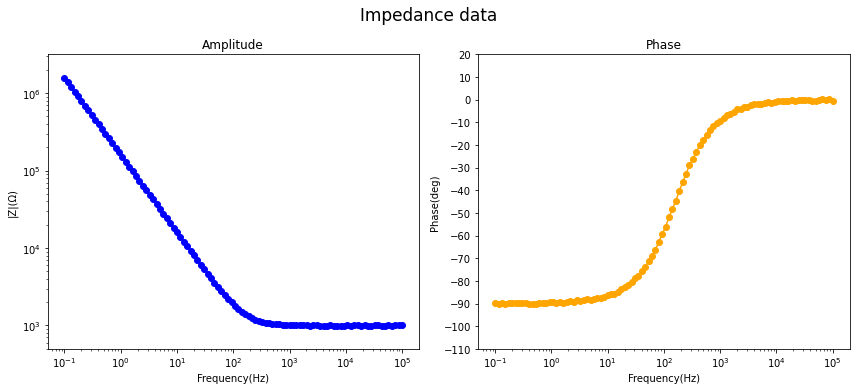

In [13]:
analyzed_circuit_rc = circuit_rc.generate_analyzed_circuit()
impedance_function = analyzed_circuit_rc.impedance

final_parameters = analyzed_circuit_rc.list_parameters()
impedance_signal = impedance_function(parameters, frequency)
seed_number = read_input_seed(config)
impedance = simulate_noise(seed_number, impedance_signal)

plot_data(frequency, impedance)

### RC parallel 
The counterpart of the last circuit is the RC in parallel (below, a scheme).
Now the string must be with the square brackets. If we use the same values
<p align="center">
    <img src="Images_tutorial/RC_parallel.png" alt="image" width="500"/>
</p>

[Circuit]\
diagram = [R1C2]

[Parameters]\
R1 = 1000\
C2 = 1e-6

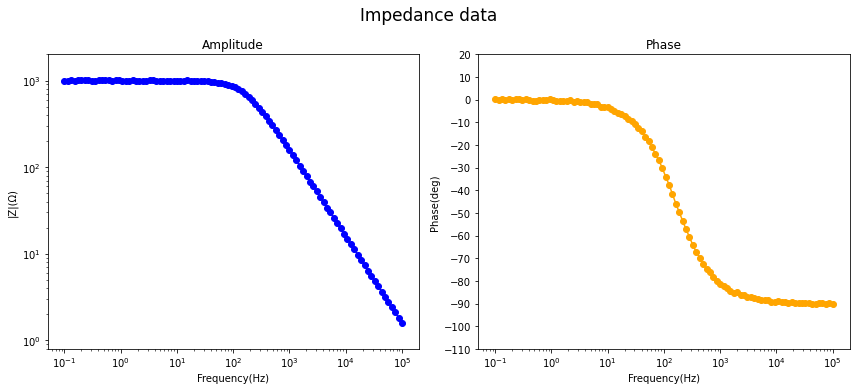

In [14]:
config = configparser.ConfigParser()
config.read('Configs_tutorial/config_gen_RC_parallel.ini')

circuit_diagram = read_input_circuit_diagram(config)
parameters_rc_p = read_input_parameters(config)

constant_elements = generate_constant_conditions_data(parameters_rc_p)
circuit_rc_p = generate_circuit(circuit_diagram, parameters_rc_p,
                                constant_elements)
analyzed_circuit_rc_p = circuit_rc_p.generate_analyzed_circuit()
impedance_function = analyzed_circuit_rc_p.impedance

final_parameters = analyzed_circuit_rc_p.list_parameters()
impedance_signal = impedance_function(parameters, frequency)
seed_number = read_input_seed(config)
impedance = simulate_noise(seed_number, impedance_signal)

plot_data(frequency, impedance)

### Many elements circuit
To make more complex circuits the only thing to do is write the correct
diagram and add more parameters. If there are multiple pairs of brackets
(which are not in conflict with each other), called cells, the algorithm will
work like this:
- the elements inside the inner pair of brackets (i.e. the most nested
cell) will be analyzed first 
- an equivalent impedance element $Zi$ with its impedance function and
parameters will replace the analyzed elements (and the related brackets)
- the new most nested cell will be analyzed as explained before, and so on
and so fourth until there is only one element $Zi$. This is actually how the
program ran behind the scenes so far.\
Thus, if we take the circuit string `(R1C2[R3Q4])` (that correspond to the
circuit below), during the analysis the string will be transformed as\
`(R1C2[R3Q4])` -> `(R1C2Z1)` -> `Z2`\
At this point, since no bracket is detected, the program knows that the
analysis is done.\
Note: the $i$ number after the $Z$ corresponds only to the number of analyzed
cells at the moment the $Zi$ element is created.
<p align="center">
    <img src="Images_tutorial/(R1C2[R3Q4]).png" alt="image" width="460"/>
</p>

For the value of this circuit let's set for the resistors $R1 = 3\,k\Omega$
and $R3 = 10\,k\Omega$ and for the capacitors $C2 = 2\,\mu F$. Regarding the
constant phase elements, we could settle for a $Q = 0.2 \cdot 10^{-6}$ and
an ideality factor $n = 0.82$.

[Circuit]\
diagram = (R1C2[R3Q4])

[Parameters]\
R1 = 3000\
C2 = 2e-6\
R3 = 10000\
Q4 = 0.2e-6 0.82

Note that both $Q$ and $n$ parameters must be put as parameters of the
$Q4$ element of the diagram, with just a whitespace that separates them

In [15]:
config = configparser.ConfigParser()
config.read('Configs_tutorial/config_gen_many_elements.ini')

circuit_diagram = read_input_circuit_diagram(config)
parameters = read_input_parameters(config)
constant_elements = generate_constant_conditions_data(parameters)
complex_circuit = generate_circuit(circuit_diagram, parameters,
                                   constant_elements)

Then, the generated impedance will be

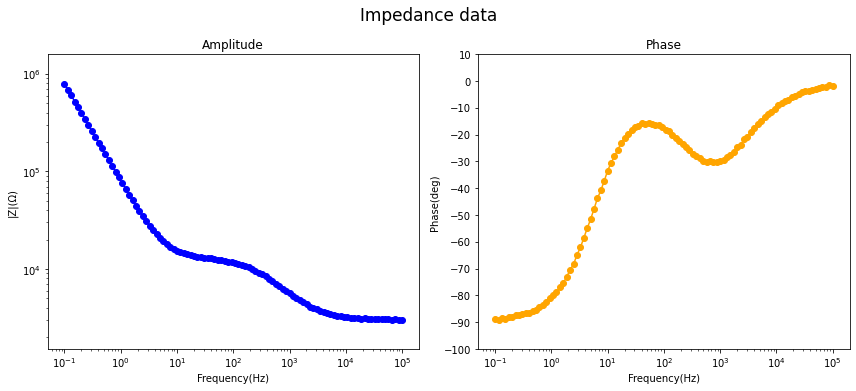

In [16]:
analyzed_complex_circuit = complex_circuit.generate_analyzed_circuit()
impedance_function = analyzed_complex_circuit.impedance

final_parameters = analyzed_complex_circuit.list_parameters()
impedance_signal = impedance_function(parameters, frequency)
seed_number = read_input_seed(config)
impedance = simulate_noise(seed_number, impedance_signal)

plot_data(frequency, impedance)

## Saving the data
After all of this data generation, we may want to save the generated data.
The displayed method is to write the frequency array and the complex
impedance array inside of a `.txt` file, where the two columns are separated  by a
`;`. It is done with

In [17]:
from read import read_output_file_name, read_output_file_format
from plot_and_save import save_data

fine_name = read_output_file_name(config)
number_of_columns = read_output_file_format(config)
save_data(fine_name, number_of_columns, frequency, impedance)

However, the amplitude and phase vs frequency format is also avaible, and can
be chosen setting the `format` equal to `3` in the `File` section of the
configuration file.